In [191]:
from sys import maxsize 
from itertools import permutations
#from graphviz import Digraph
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from graphviz import Digraph
import pandas as pd

In [192]:
V = 4
req = [] 

def tsp(graph, v, currPos, n, count, cost): 
  
    # If last node is reached and it has  
    # a link to the starting node
    if (count == n and graph[currPos][0]): 
        req.append(cost + graph[currPos][0]) 
        return
    # BACKTRACKING STEP 
    # in this Loop we just traverse the adjacency list  of currPos node and increasing the count 
    # by 1 and cost by graph[currPos][i] value 
    for i in range(n): 
        if (v[i] == False and graph[currPos][i]): 
              
            # Mark as visited 
            v[i] = True
            tsp(graph, v, i, n, count + 1,  
                cost + graph[currPos][i]) 
              
            # Mark ith node as unvisited 
            v[i] = False
            final  = min(req)
    return(min(req))       

    

In [193]:
def plotgraph(i,s):
    nodes_list = list(i)
    nodes_list.append(s)
    nodes_list.insert(0,s)
    nodes_list = list(map(str,nodes_list)) 
    print(nodes_list)
    # Base class for directed graphs.
    # A DiGraph stores nodes and edges with optional data, or attributes.
    G = nx.DiGraph()
    # creates a list of edge tuples
    G.add_edges_from([(nodes_list[i],nodes_list[i+1]) for i in range(0,len(nodes_list)-1)])
    # Position nodes using a force-directed algorithm (NetworkX graph is given as input)
    pos = nx.spring_layout(G,k=4)
    #This draws only the nodes of the graph G.
    nx.draw_networkx_nodes(G, pos,node_color = "yellow", node_size = 300)
    # Draw node labels on the graph G.
    nx.draw_networkx_labels(G, pos)
    # This draws only the edges of the graph G.
    nx.draw_networkx_edges(G, pos, edge_color='b', arrows=True)
    # function to show the plot
    plt.show()


In [194]:
def printpath(graph,s,mindist):
    vertex = [] 
    for i in range(V): 
        if i != s: 
            vertex.append(i) 
 
    # store minimum weight Hamiltonian Cycle 
    min_path = maxsize 
    next_permutation=permutations(vertex)
    for i in next_permutation:
        # store current Path weight(cost) 
        current_pathweight = 0
 
        # compute current path weight 
        k = s 
        for j in i: 
            current_pathweight += graph[k][j]
            k = j 
        current_pathweight += graph[k][s] 
        # update minimum 
        min_path = min(min_path, current_pathweight)
        if(current_pathweight == mindist): 
            plotgraph(i,s)   

In [195]:
#graph = [[0, 10, 15, 20], [5, 0, 9, 10], [6, 13, 0, 12], [8, 8, 9, 0]]
x = np.random.randint(50, size = (4, 4))
nodes = '1234'
headers = [_ for _ in nodes] 
np.fill_diagonal(x, 0)
s = pd.DataFrame(x, index=headers, columns=headers) 
print(s)
graph = x
s = 0
n = 4
    # has been visited or not 
v = [False for i in range(n)] 
      
    # Mark 0th node as visited 
v[0] = True
mindist = tsp(graph, v, 0, n, 1, 0)
print("The smallest distance between the cities that can be covered is : ")
print(mindist)



    1   2   3   4
1   0  22  14  48
2  18   0  32  47
3  27  18   0  13
4  46   5  13   0
The smallest distance between the cities that can be covered is : 
50


['0', '2', '3', '1', '0']


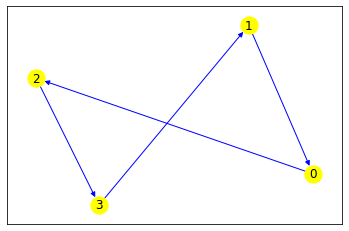

In [196]:
printpath(graph,s,mindist)